In [1]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import csv

# ds = stream(os.path.join('data', 'Motor_Vehicle_Collisions_-_Crashes.csv'))

In [6]:
mv_collision = pd.read_csv('data\Motor_Vehicle_Collisions_-_Crashes.csv', dtype=str)

mv_collision.head()

CRASH DATE CRASH TIME   BOROUGH ZIP CODE  LATITUDE  LONGITUDE  \
0  04/14/2021       5:32       NaN      NaN       NaN        NaN   
1  04/13/2021      21:35  BROOKLYN    11217  40.68358  -73.97617   
2  04/15/2021      16:15       NaN      NaN       NaN        NaN   
3  04/13/2021      16:00  BROOKLYN    11222       NaN        NaN   
4  04/12/2021       8:25       NaN      NaN         0          0   

                LOCATION                    ON STREET NAME CROSS STREET NAME  \
0                    NaN           BRONX WHITESTONE BRIDGE               NaN   
1  (40.68358, -73.97617)                               NaN               NaN   
2                    NaN          HUTCHINSON RIVER PARKWAY               NaN   
3                    NaN                 VANDERVORT AVENUE    ANTHONY STREET   
4             (0.0, 0.0)  EDSON AVENUE                                   NaN   

                            OFF STREET NAME  ...  \
0                                       NaN  ...   
1  620       ATLANTIC AVENUE                 ...   
2                                       NaN  ...   
3                                       NaN  ...   
4                                       NaN  ...   

  CONTRIBUTING FACTOR VEHICLE 2 CONTRIBUTING FACTOR VEHICLE 3  \
0                   Unspecified                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                   Unspecified                           NaN   
4                   Unspecified                           NaN   

  CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5 COLLISION_ID  \
0                           NaN                           NaN      4407480   
1                           NaN                           NaN      4407147   
2                           NaN                           NaN      4407665   
3                           NaN                           NaN      4407811   
4                           NaN                           NaN      4406885   

                   VEHICLE TYPE CODE 1 VEHICLE TYPE CODE 2  \
0                                Sedan               Sedan   
1                                Sedan                 NaN   
2  Station Wagon/Sport Utility Vehicle                 NaN   
3                                Sedan                 NaN   
4  Station Wagon/Sport Utility Vehicle               Sedan   

  VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  
0                 NaN                 NaN                 NaN  
1                 NaN                 NaN                 NaN  
2                 NaN                 NaN                 NaN  
3                 NaN                 NaN                 NaN  
4                 NaN                 NaN                 NaN  

[5 rows x 29 columns]

In [7]:
import os

from openclean.pipeline import stream

ds = stream(os.path.join('data', 'Motor_Vehicle_Collisions_-_Crashes.csv'))

In [8]:
ds.columns

['CRASH DATE',
 'CRASH TIME',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'ON STREET NAME',
 'CROSS STREET NAME',
 'OFF STREET NAME',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'CONTRIBUTING FACTOR VEHICLE 3',
 'CONTRIBUTING FACTOR VEHICLE 4',
 'CONTRIBUTING FACTOR VEHICLE 5',
 'COLLISION_ID',
 'VEHICLE TYPE CODE 1',
 'VEHICLE TYPE CODE 2',
 'VEHICLE TYPE CODE 3',
 'VEHICLE TYPE CODE 4',
 'VEHICLE TYPE CODE 5']

In [9]:
ds.head()

CRASH DATE CRASH TIME   BOROUGH ZIP CODE  LATITUDE  LONGITUDE  \
0  04/14/2021       5:32                                           
1  04/13/2021      21:35  BROOKLYN    11217  40.68358  -73.97617   
2  04/15/2021      16:15                                           
3  04/13/2021      16:00  BROOKLYN    11222                        
4  04/12/2021       8:25                            0          0   
5  04/13/2021      17:11                                           
6  04/13/2021      17:30    QUEENS    11106                        
7  04/16/2021      23:30                                           
8  04/11/2021      17:00                                           
9  04/16/2021      21:15                                           

                LOCATION                    ON STREET NAME CROSS STREET NAME  \
0                                  BRONX WHITESTONE BRIDGE                     
1  (40.68358, -73.97617)                                                       
2                                 HUTCHINSON RIVER PARKWAY                     
3                                        VANDERVORT AVENUE    ANTHONY STREET   
4             (0.0, 0.0)  EDSON AVENUE                                         
5                                   VERRAZANO BRIDGE UPPER                     
6                                                    33 st             31ave   
7                                            SHORE PARKWAY                     
8                         GOWANUS RAMP                                         
9                                 BRONX RIVER PARKWAY RAMP                     

                            OFF STREET NAME  ...  \
0                                            ...   
1  620       ATLANTIC AVENUE                 ...   
2                                            ...   
3                                            ...   
4                                            ...   
5                                            ...   
6                                            ...   
7                                            ...   
8                                            ...   
9                                            ...   

  CONTRIBUTING FACTOR VEHICLE 2 CONTRIBUTING FACTOR VEHICLE 3  \
0                   Unspecified                                 
1                                                               
2                                                               
3                   Unspecified                                 
4                   Unspecified                                 
5                   Unspecified                                 
6                   Unspecified                                 
7                                                               
8               Other Vehicular                                 
9                   Unspecified                                 

  CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5 COLLISION_ID  \
0                                                                  4407480   
1                                                                  4407147   
2                                                                  4407665   
3                                                                  4407811   
4                                                                  4406885   
5                                                                  4407883   
6                                                                  4408019   
7                                                                  4408060   
8                                                                  4406314   
9                                                                  4408149   

                   VEHICLE TYPE CODE 1 VEHICLE TYPE CODE 2  \
0                                Sedan               Sedan   
1                                Sedan                       
2  Station Wagon/Sport Utility Vehicle 

In [10]:
ds.count()

1838945

In [11]:
# Get basic profile information for all columns in the dataset.

profiles = ds.profile()
profiles

[{'column': 'CRASH DATE',
  'stats': {'totalValueCount': 1838945,
   'emptyValueCount': 0,
   'datatypes': defaultdict(collections.Counter,
               {'total': Counter({'date': 1838945})}),
   'minmaxValues': {'date': {'minimum': datetime.datetime(2012, 7, 1, 0, 0),
     'maximum': datetime.datetime(2021, 11, 7, 0, 0)}}}},
 {'column': 'CRASH TIME',
  'stats': {'totalValueCount': 1838945,
   'emptyValueCount': 0,
   'datatypes': defaultdict(collections.Counter,
               {'total': Counter({'str': 1838945})}),
   'minmaxValues': {'str': {'minimum': '0:00', 'maximum': '9:59'}}}},
 {'column': 'BOROUGH',
  'stats': {'totalValueCount': 1838945,
   'emptyValueCount': 567999,
   'datatypes': defaultdict(collections.Counter,
               {'total': Counter({'str': 1270946})}),
   'minmaxValues': {'str': {'minimum': 'BRONX', 'maximum': 'STATEN ISLAND'}}}},
 {'column': 'ZIP CODE',
  'stats': {'totalValueCount': 1838945,
   'emptyValueCount': 568221,
   'datatypes': defaultdict(collecti

In [12]:
# Print number of empty cells for each column

profiles.stats()['empty']

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           567999
ZIP CODE                          568221
LATITUDE                          214955
LONGITUDE                         214955
LOCATION                          214955
ON STREET NAME                    375841
CROSS STREET NAME                 660942
OFF STREET NAME                  1555473
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5304
CONTRIBUTING FACTOR VEHICLE 2     266246
CONTRIBUTING FACTOR VEHICLE 3    1713040
CONTRIBUTING FACTOR VEHICLE 4    1811411
CONTRIBUTING FACTOR VEHICLE 5    1831645
COLLISION_ID                           0
VEHICLE TYPE COD

In [13]:

# How many records are there for date '09/28/2019'
from openclean.function.eval.base import Col

ds.filter(Col('BOROUGH') == 'BROOKLYN').count()

400099

In [14]:
# Print column type information (as data frame)

profiles.types()

date    float      int      str
CRASH DATE                     1838945        0        0        0
CRASH TIME                           0        0        0  1838945
BOROUGH                              0        0        0  1270946
ZIP CODE                             0        0  1270682       42
LATITUDE                             0  1621932     2058        0
LONGITUDE                            0  1621925     2065        0
LOCATION                             0        0        0  1623990
ON STREET NAME                      98        0       18  1462988
CROSS STREET NAME                    2        1       50  1177950
OFF STREET NAME                     30        0        1   283441
NUMBER OF PERSONS INJURED            0        0  1838927        0
NUMBER OF PERSONS KILLED             0        0  1838914        0
NUMBER OF PEDESTRIANS INJURED        0        0  1838945        0
NUMBER OF PEDESTRIANS KILLED         0        0  1838945        0
NUMBER OF CYCLIST INJURED            0        0  1838945        0
NUMBER OF CYCLIST KILLED             0        0  1838945        0
NUMBER OF MOTORIST INJURED           0        0  1838945        0
NUMBER OF MOTORIST KILLED            0        0  1838945        0
CONTRIBUTING FACTOR VEHICLE 1        0        0      111  1833530
CONTRIBUTING FACTOR VEHICLE 2        0        0       27  1572672
CONTRIBUTING FACTOR VEHICLE 3        0        0        4   125901
CONTRIBUTING FACTOR VEHICLE 4        0        0        0    27534
CONTRIBUTING FACTOR VEHICLE 5        0        0        0     7300
COLLISION_ID                         0        0  1838945        0
VEHICLE TYPE CODE 1                  0        0       14  1828842
VEHICLE TYPE CODE 2                  0        0       16  1522568
VEHICLE TYPE CODE 3                  0        0        0   122165
VEHICLE TYPE CODE 4                  0        0        0    26708
VEHICLE TYPE CODE 5                  0        0        0     7099

In [15]:
# Get a quick look at the columns that contain values of
# different (raw) data types.

profiles.multitype_columns().types()

date    float      int      str
ZIP CODE                          0        0  1270682       42
LATITUDE                          0  1621932     2058        0
LONGITUDE                         0  1621925     2065        0
ON STREET NAME                   98        0       18  1462988
CROSS STREET NAME                 2        1       50  1177950
OFF STREET NAME                  30        0        1   283441
CONTRIBUTING FACTOR VEHICLE 1     0        0      111  1833530
CONTRIBUTING FACTOR VEHICLE 2     0        0       27  1572672
CONTRIBUTING FACTOR VEHICLE 3     0        0        4   125901
VEHICLE TYPE CODE 1               0        0       14  1828842
VEHICLE TYPE CODE 2               0        0       16  1522568

In [16]:
profiles.minmax('ON STREET NAME')

min                               max
str                                     estfarms road                  
date               0103-11-18 00:00:00               2069-11-18 00:00:00
int                                 12                              2430

In [17]:
# Which values are identified as 'date' in column 'BUILDING'

from openclean.function.eval.datatype import IsDatetime

ds.select('ON STREET NAME').filter(IsDatetime('ON STREET NAME')).distinct()

Counter({'158 st                          ': 1,
         '47th St                         ': 1,
         '34                              ': 1,
         '53th St                         ': 1,
         '78 st                           ': 1,
         '156 ST                          ': 1,
         '154th st                        ': 1,
         '2430                            ': 1,
         '64th St                         ': 2,
         '172nd                           ': 1,
         '12                              ': 1,
         '552                             ': 1,
         '61th st                         ': 1,
         '79th St                         ': 1,
         '69th St                         ': 2,
         '128 ST                          ': 1,
         '175 st                          ': 1,
         '48th St                         ': 2,
         '60st                            ': 1,
         '235                             ': 1,
         '96 ST                         

In [18]:
from openclean.function.eval.base import Col
from openclean.function.eval.datatype import IsFloat

ds.filter(IsFloat('CROSS STREET NAME')).distinct('CROSS STREET NAME')

Counter({'192': 1,
         '10': 7,
         '144': 1,
         '50': 5,
         '5': 7,
         '.1': 1,
         '0': 3,
         '20': 3,
         '1': 3,
         '100': 2,
         '2': 1,
         '15': 1,
         '14': 1,
         '153': 1,
         '43': 1,
         '25': 1,
         '37': 2,
         '2475': 1,
         '450': 1,
         '108': 1,
         '150': 1,
         '6': 1,
         '63': 1,
         '21': 1,
         '138': 1,
         '38': 1,
         '112': 1})

In [19]:
# List the distinct values (and their total counts) for
# column 'BOROUGH'

ds.distinct('BOROUGH')

Counter({'': 567999,
         'BROOKLYN': 400099,
         'QUEENS': 340416,
         'STATEN ISLAND': 53540,
         'BRONX': 184465,
         'MANHATTAN': 292426})

In [20]:
# Profile only those rows that have a 'BOROUGH' value ''. Here we use the default
# column profiler that generates sets of distinct values for each column.

from openclean.function.eval.base import Col
from openclean.profiling.column import DefaultColumnProfiler

boro_0 = ds.filter(Col('BOROUGH') == '').profile(default_profiler=DefaultColumnProfiler)
boro_0.stats()

total   empty  distinct  uniqueness    entropy
CRASH DATE                     567999       0      3417    0.006016  11.641040
CRASH TIME                     567999       0      1440    0.002535   8.896879
BOROUGH                        567999  567999         0         NaN        NaN
ZIP CODE                       567999  567999         0         NaN        NaN
LATITUDE                       567999  181789     41368    0.107113  13.848941
LONGITUDE                      567999  181789     34846    0.090226  13.668711
LOCATION                       567999  181789     53357    0.138155  14.085481
ON STREET NAME                 567999  124544     10862    0.024494   9.758336
CROSS STREET NAME              567999  409127      9314    0.058626  10.928608
OFF STREET NAME                567999  535264     18956    0.579074  13.289462
NUMBER OF PERSONS INJURED      567999       7        22    0.000039   1.028665
NUMBER OF PERSONS KILLED       567999       8         5    0.000009   0.017236
NUMBER OF PEDESTRIANS INJURED  567999       0         8    0.000014   0.208275
NUMBER OF PEDESTRIANS KILLED   567999       0         3    0.000005   0.008269
NUMBER OF CYCLIST INJURED      567999       0         4    0.000007   0.124547
NUMBER OF CYCLIST KILLED       567999       0         2    0.000004   0.001313
NUMBER OF MOTORIST INJURED     567999       0        21    0.000037   0.901050
NUMBER OF MOTORIST KILLED      567999       0         5    0.000009   0.009543
CONTRIBUTING FACTOR VEHICLE 1  567999    1248        61    0.000108   3.701259
CONTRIBUTING FACTOR VEHICLE 2  567999   71696        60    0.000121   1.311565
CONTRIBUTING FACTOR VEHICLE 3  567999  517235        46    0.000906   0.801149
CONTRIBUTING FACTOR VEHICLE 4  567999  557568        33    0.003164   0.758269
CONTRIBUTING FACTOR VEHICLE 5  567999  565486        20    0.007959   0.826893
COLLISION_ID                   567999       0    567999    1.000000  19.115529
VEHICLE TYPE CODE 1            567999    2564       677    0.001197   3.111409
VEHICLE TYPE CODE 2            567999   87814       741    0.001543   3.360433
VEHICLE TYPE CODE 3            567999  518943       125    0.002548   2.857654
VEHICLE TYPE CODE 4            567999  557970        59    0.005883   2.747808
VEHICLE TYPE CODE 5            567999  565576        43    0.017747   2.690305

In [21]:
# NOTE (for cleaning step):
#
# delete those records that have 'ZIPCODE' 'N/A'


In [22]:
ds.distinct('CONTRIBUTING FACTOR VEHICLE 1')

Counter({'Following Too Closely': 95854,
         'Unspecified': 650111,
         'Pavement Slippery': 17997,
         'Driver Inattention/Distraction': 356674,
         'Other Vehicular': 57756,
         'Passing Too Closely': 43204,
         'Passing or Lane Usage Improper': 47294,
         'Driver Inexperience': 27809,
         'Failure to Yield Right-of-Way': 106539,
         'Brakes Defective': 5992,
         'Turning Improperly': 45738,
         'Unsafe Speed': 20434,
         'Backing Unsafely': 69541,
         'Reaction to Uninvolved Vehicle': 17185,
         'View Obstructed/Limited': 11660,
         'Steering Failure': 2377,
         'Traffic Control Disregarded': 30063,
         'Drugs (illegal)': 686,
         'Aggressive Driving/Road Rage': 7855,
         'Fell Asleep': 4565,
         'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion': 7302,
         'Alcohol Involvement': 18505,
         'Unsafe Lane Changing': 35943,
         'Pavement Defective': 2221,
         'Ot

In [23]:
ds.distinct('VEHICLE TYPE CODE 1')

Counter({'Sedan': 466972,
         'Station Wagon/Sport Utility Vehicle': 371406,
         'Taxi': 45326,
         '锟組BU': 1,
         'Pick-up Truck': 29531,
         'Box Truck': 20469,
         'Bus': 17121,
         '': 10089,
         'Ambulance': 2983,
         'Tow Truck / Wrecker': 1067,
         'E-Bike': 1129,
         'Van': 7604,
         'Flat Bed': 2012,
         'Moped': 702,
         'Tractor Truck Diesel': 8692,
         'AMBULANCE': 2465,
         'Bike': 10993,
         'Trailer': 14,
         'Motorcycle': 6130,
         'Garbage or Refuse': 1763,
         'SCHOOL BUS': 11,
         'Lift Boom': 197,
         'scooter': 8,
         'CATER': 2,
         'PKUP': 2,
         'Carry All': 1649,
         'FDNY Ambul': 4,
         '3-Door': 243,
         'Beverage Truck': 265,
         'SEMI TRAIL': 2,
         'Dump': 3078,
         'Convertible': 3251,
         'dump': 28,
         'Flat Rack': 277,
         'GARBAGE TR': 6,
         'Motorbike': 354,
         'Tanker':

Data Cleaning

In [3]:
# Open the downloaded dataset to extract the relevant columns and records.

import os

from openclean.pipeline import stream

ds = stream(os.path.join('data', 'Motor_Vehicle_Collisions_-_Crashes.csv'))

Extract Relevant Records

In [4]:
# During data profiling we decided to
#
# - convert the 'CONTRIBUTING FACTOR VEHICLE 1' for records from LowerCase to UpperCase
# - replace the 'CONTRIBUTING FACTOR VEHICLE 1' for records that have value '' or 'unknown'
# - replace the 'VEHICLE TYPE CODE 1' for records that have integer or invalid value.
# - remove ambiguous records 
#   + 'BOROUGH' == 'Unknown'

from datetime import datetime
from openclean.function.eval.base import Col
from openclean.function.eval.datatype import Datetime
from openclean.function.eval.logic import And
from openclean.function.eval.null import IsNotEmpty
from openclean.function.eval.domain import Lookup
from openclean.function.eval.datatype import IsFloat
from openclean.function.eval.datatype import IsDatetime
from openclean.function.eval.datatype import IsInt


df = ds\
    .filter(And(Col('BOROUGH') != '', not IsFloat('CONTRIBUTING FACTOR VEHICLE 1')\
                , IsNotEmpty('VEHICLE TYPE CODE 1'), not IsInt('VEHICLE TYPE CODE 1')\
                , not IsInt('VEHICLE TYPE CODE 2')\
                , not IsDatetime('ON STREET NAME'), not IsDatetime('OFF STREET NAME')))\
    .typecast()\
    .to_df()


What is the size of the resulting dataset?

In [5]:
df.shape

(1263421, 29)

Remove any exact duplicates from the dataset.

In [6]:
df = df.drop_duplicates()
df.shape

(1263421, 29)

Profile the dataset.

In [7]:
from openclean.profiling.dataset import dataset_profile

profile = dataset_profile(df)

In [9]:
profile.stats()

total    empty  distinct  uniqueness  \
CRASH DATE                     1263421        0      3417    0.002705   
CRASH TIME                     1263421        0      1440    0.001140   
BOROUGH                        1263421        0         5    0.000004   
ZIP CODE                       1263421      222       232    0.000184   
LATITUDE                       1263421    32664    114188    0.092779   
LONGITUDE                      1263421    32664     87438    0.071044   
LOCATION                       1263421    32664    214509    0.174290   
ON STREET NAME                 1263421   249005     12026    0.011855   
CROSS STREET NAME              1263421   249518     15514    0.015301   
OFF STREET NAME                1263421  1014975    158665    0.638630   
NUMBER OF PERSONS INJURED      1263421       11        27    0.000021   
NUMBER OF PERSONS KILLED       1263421       19         7    0.000006   
NUMBER OF PEDESTRIANS INJURED  1263421        0        12    0.000009   
NUMBER OF PEDESTRIANS KILLED   1263421        0         4    0.000003   
NUMBER OF CYCLIST INJURED      1263421        0         5    0.000004   
NUMBER OF CYCLIST KILLED       1263421        0         3    0.000002   
NUMBER OF MOTORIST INJURED     1263421        0        27    0.000021   
NUMBER OF MOTORIST KILLED      1263421        0         6    0.000005   
CONTRIBUTING FACTOR VEHICLE 1  1263421     1897        61    0.000048   
CONTRIBUTING FACTOR VEHICLE 2  1263421   188826        61    0.000057   
CONTRIBUTING FACTOR VEHICLE 3  1263421  1188688        47    0.000629   
CONTRIBUTING FACTOR VEHICLE 4  1263421  1246471        33    0.001947   
CONTRIBUTING FACTOR VEHICLE 5  1263421  1258686        23    0.004857   
COLLISION_ID                   1263421        0   1263421    1.000000   
VEHICLE TYPE CODE 1            1263421        0      1029    0.000814   
VEHICLE TYPE CODE 2            1263421   221022      1130    0.001084   
VEHICLE TYPE CODE 3            1263421  1190312       151    0.002065   
VEHICLE TYPE CODE 4            1263421  1246742        66    0.003957   
VEHICLE TYPE CODE 5            1263421  1258745        46    0.009837   

                                 entropy  
CRASH DATE                     11.667621  
CRASH TIME                      8.937909  
BOROUGH                         2.118189  
ZIP CODE                        7.220971  
LATITUDE                       15.590717  
LONGITUDE                      15.307618  
LOCATION                       16.099610  
ON STREET NAME                 10.577121  
CROSS STREET NAME              11.718453  
OFF STREET NAME                16.785520  
NUMBER OF PERSONS INJURED       0.931375  
NUMBER OF PERSONS KILLED        0.012853  
NUMBER OF PEDESTRIANS INJURED   0.323011  
NUMBER OF PEDESTRIANS KILLED    0.007911  
NUMBER OF CYCLIST INJURED       0.180844  
NUMBER OF CYCLIST KILLED        0.001539  
NUMBER OF MOTORIST INJURED      0.689270  
NUMBER OF MOTORIST KILLED       0.004825  
CONTRIBUTING FACTOR VEHICLE 1   3.392917  
CONTRIBUTING FACTOR VEHICLE 2   1.184558  
CONTRIBUTING FACTOR VEHICLE 3   0.427520  
CONTRIBUTING FACTOR VEHICLE 4   0.296991  
CONTRIBUTING FACTOR VEHICLE 5   0.269669  
COLLISION_ID                   20.268904  
VEHICLE TYPE CODE 1             3.310598  
VEHICLE TYPE CODE 2             3.634206  
VEHICLE TYPE CODE 3             2.934064  
VEHICLE TYPE CODE 4             2.702211  
VEHICLE TYPE CODE 5             2.657117

In [13]:
profile.types()

date   float      int     str
CRASH DATE                     3417       0        0       0
CRASH TIME                        0       0        0    1440
BOROUGH                           0       0        0       5
ZIP CODE                          0       0      231       1
LATITUDE                          0  114187        1       0
LONGITUDE                         0   87436        2       0
LOCATION                          0       0        0  214509
ON STREET NAME                   38       0        2   11986
CROSS STREET NAME                 0       0        3   15511
OFF STREET NAME                  25       0        0  158640
NUMBER OF PERSONS INJURED         0       0       27       0
NUMBER OF PERSONS KILLED          0       0        7       0
NUMBER OF PEDESTRIANS INJURED     0       0       12       0
NUMBER OF PEDESTRIANS KILLED      0       0        4       0
NUMBER OF CYCLIST INJURED         0       0        5       0
NUMBER OF CYCLIST KILLED          0       0        3       0
NUMBER OF MOTORIST INJURED        0       0       27       0
NUMBER OF MOTORIST KILLED         0       0        6       0
CONTRIBUTING FACTOR VEHICLE 1     0       0        2      59
CONTRIBUTING FACTOR VEHICLE 2     0       0        2      59
CONTRIBUTING FACTOR VEHICLE 3     0       0        1      46
CONTRIBUTING FACTOR VEHICLE 4     0       0        0      33
CONTRIBUTING FACTOR VEHICLE 5     0       0        0      23
COLLISION_ID                      0       0  1263421       0
VEHICLE TYPE CODE 1               0       0        9    1020
VEHICLE TYPE CODE 2               0       0        7    1123
VEHICLE TYPE CODE 3               0       0        0     151
VEHICLE TYPE CODE 4               0       0        0      66
VEHICLE TYPE CODE 5               0       0        0      46

Delete records with datatime datatype

Repair Strategy
First, we are goin to take a closer look at records. Are there other records are invalid and if how many? Should we remove all records with unsatisfying datatype? Are there other records that we may want to get rid of.


In [10]:
from openclean.function.eval.logic import Or
from openclean.function.eval.null import IsEmpty
from openclean.operator.transform.filter import delete

df = delete(df, Or(IsDatetime('ON STREET NAME'), IsDatetime('OFF STREET NAME')))


In [11]:
df.shape

(1263347, 29)

Export cleaned dataset

In [12]:
df.to_csv('data/Motor_Vehicle_Collisions_-_Crashes_cleaned.csv')

In [31]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import shapely.geometry as sgeo

#https://data.cityofnewyork.us/City-Government/Community-Districts/yfnk-k7r4
nyc_geo = gpd.read_file('data/nyc_community_districts.geojson')

In [12]:
mv_collision = pd.read_csv('data/Motor_Vehicle_Collisions_-_Crashes_cleaned.csv', dtype=str)

mv_collision.head(10)

Unnamed: 0           CRASH DATE CRASH TIME        BOROUGH ZIP CODE  \
0          1  2021-04-13 00:00:00      21:35       BROOKLYN    11217   
1          3  2021-04-13 00:00:00      16:00       BROOKLYN    11222   
2          6  2021-04-13 00:00:00      17:30         QUEENS    11106   
3         10  2021-04-11 00:00:00      21:06       BROOKLYN    11226   
4         11  2021-04-15 00:00:00      20:00  STATEN ISLAND    10304   
5         13  2019-05-21 00:00:00      22:50       BROOKLYN    11201   
6         15  2021-02-26 00:00:00      14:50          BRONX    10461   
7         17  2021-03-31 00:00:00      22:20       BROOKLYN    11234   
8         18  2021-04-06 00:00:00      22:58  STATEN ISLAND    10312   
9         22  2021-04-15 00:00:00      13:30          BRONX    10461   

    LATITUDE  LONGITUDE                LOCATION  \
0   40.68358  -73.97617   (40.68358, -73.97617)   
1        NaN        NaN                     NaN   
2        NaN        NaN                     NaN   
3        NaN        NaN                     NaN   
4        NaN        NaN                     NaN   
5   40.69754  -73.98312   (40.69754, -73.98312)   
6  40.843464    -73.836    (40.843464, -73.836)   
7  40.626457    -73.918    (40.626457, -73.918)   
8  40.526894  -74.16728  (40.526894, -74.16728)   
9  40.857365  -73.84657  (40.857365, -73.84657)   

                     ON STREET NAME CROSS STREET NAME  ...  \
0                               NaN               NaN  ...   
1                 VANDERVORT AVENUE    ANTHONY STREET  ...   
2                             33 st             31ave  ...   
3  BEVERLEY ROAD                       EAST 21 STREET  ...   
4                 GREENFIELD AVENUE     OSGOOD AVENUE  ...   
5                       GOLD STREET    CONCORD STREET  ...   
6                               NaN               NaN  ...   
7                      RALPH AVENUE          AVENUE K  ...   
8                    BARCLAY AVENUE   HYLAN BOULEVARD  ...   
9                               NaN               NaN  ...   

  CONTRIBUTING FACTOR VEHICLE 2 CONTRIBUTING FACTOR VEHICLE 3  \
0                           NaN                           NaN   
1                   Unspecified                           NaN   
2                   Unspecified                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   
5                   Unspecified                           NaN   
6                   Unspecified                           NaN   
7                   Unspecified                           NaN   
8                  Unsafe Speed                           NaN   
9                   Unspecified                           NaN   

  CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5 COLLISION_ID  \
0                           NaN                           NaN      4407147   
1                           NaN                           NaN      4407811   
2                           NaN                           NaN      4408019   
3                           NaN                           NaN      4406488   
4                           NaN                           NaN      4408310   
5                           NaN                           NaN      4136992   
6                           NaN                           NaN      4395664   
7                           NaN                           NaN      4403773   
8                           NaN                           NaN      4405244   
9                           NaN                           NaN      4407778   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0                                Sedan                                  NaN   
1                                Sedan                                  NaN   
2                                Sedan                                Sedan   
3                                 Taxi                                  N

In [26]:
mv_collision = mv_collision[mv_collision['LOCATION'].notna()]
mv_collision['LONGITUDE'] = mv_collision['LONGITUDE'].astype(float)
mv_collision['LATITUDE'] = mv_collision['LATITUDE'].astype(float)
mv_collision['geometry'] = mv_collision.apply(lambda row: sgeo.Point(row.LONGITUDE, row.LATITUDE), axis = 1)
mv_collision.head()

Unnamed: 0           CRASH DATE CRASH TIME        BOROUGH ZIP CODE  \
0          1  2021-04-13 00:00:00      21:35       BROOKLYN    11217   
5         13  2019-05-21 00:00:00      22:50       BROOKLYN    11201   
6         15  2021-02-26 00:00:00      14:50          BRONX    10461   
7         17  2021-03-31 00:00:00      22:20       BROOKLYN    11234   
8         18  2021-04-06 00:00:00      22:58  STATEN ISLAND    10312   

    LATITUDE  LONGITUDE                LOCATION  ON STREET NAME  \
0  40.683580  -73.97617   (40.68358, -73.97617)             NaN   
5  40.697540  -73.98312   (40.69754, -73.98312)     GOLD STREET   
6  40.843464  -73.83600    (40.843464, -73.836)             NaN   
7  40.626457  -73.91800    (40.626457, -73.918)    RALPH AVENUE   
8  40.526894  -74.16728  (40.526894, -74.16728)  BARCLAY AVENUE   

  CROSS STREET NAME  ... CONTRIBUTING FACTOR VEHICLE 3  \
0               NaN  ...                           NaN   
5    CONCORD STREET  ...                           NaN   
6               NaN  ...                           NaN   
7          AVENUE K  ...                           NaN   
8   HYLAN BOULEVARD  ...                           NaN   

  CONTRIBUTING FACTOR VEHICLE 4 CONTRIBUTING FACTOR VEHICLE 5 COLLISION_ID  \
0                           NaN                           NaN      4407147   
5                           NaN                           NaN      4136992   
6                           NaN                           NaN      4395664   
7                           NaN                           NaN      4403773   
8                           NaN                           NaN      4405244   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0                                Sedan                                  NaN   
5                                 锟組BU                                 Taxi   
6  Station Wagon/Sport Utility Vehicle                                  NaN   
7                                Sedan                                Sedan   
8  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   

  VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  \
0                 NaN                 NaN                 NaN   
5                 NaN                 NaN                 NaN   
6                 NaN                 NaN                 NaN   
7                 NaN                 NaN                 NaN   
8                 NaN                 NaN                 NaN   

                               geometry  
0            POINT (-73.97617 40.68358)  
5            POINT (-73.98312 40.69754)  
6             POINT (-73.836 40.843464)  
7  POINT (-73.91800000000001 40.626457)  
8  POINT (-74.16728000000001 40.526894)  

[5 rows x 31 columns]

In [27]:
mv_collision.count()

Unnamed: 0                       1230732
CRASH DATE                       1230732
CRASH TIME                       1230732
BOROUGH                          1230732
ZIP CODE                         1230529
LATITUDE                         1230732
LONGITUDE                        1230732
LOCATION                         1230732
ON STREET NAME                    986842
CROSS STREET NAME                 986363
OFF STREET NAME                   243339
NUMBER OF PERSONS INJURED        1230721
NUMBER OF PERSONS KILLED         1230713
NUMBER OF PEDESTRIANS INJURED    1230732
NUMBER OF PEDESTRIANS KILLED     1230732
NUMBER OF CYCLIST INJURED        1230732
NUMBER OF CYCLIST KILLED         1230732
NUMBER OF MOTORIST INJURED       1230732
NUMBER OF MOTORIST KILLED        1230732
CONTRIBUTING FACTOR VEHICLE 1    1228881
CONTRIBUTING FACTOR VEHICLE 2    1046770
CONTRIBUTING FACTOR VEHICLE 3      73016
CONTRIBUTING FACTOR VEHICLE 4      16567
CONTRIBUTING FACTOR VEHICLE 5       4628
COLLISION_ID    

In [28]:
mv_collision_geo = nyc_geo.copy(deep=True)
# mv_collision_geo.head()
# mv_collision_geo.set_geometry(col='LOCATION', inplace=True)
mv_collision_geo['case_num'] = 0
for i, c_row in mv_collision.iterrows():
    for j, g_row in mv_collision_geo.iterrows():
        if g_row.geometry.contains(c_row.geometry):
            mv_collision_geo.at[j,'case_num'] += 1

mv_collision_geo['case_num'] 

0     17324
1     21562
2     23105
3     37804
4     45279
      ...  
66    15440
67    16197
68      283
69    11154
70    16851
Name: case_num, Length: 71, dtype: int64

In [36]:
mv_collision_geo.head()

boro_cd     shape_area     shape_leng  \
0     101  42689119.0133  74168.5878924   
1     102  37689205.9401  34130.5952768   
2     103  46879779.2986  30695.6409632   
3     104  49311715.1126  67623.6699012   
4     105  43790329.8699  35288.1885095   

                                            geometry  case_num  
0  MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...     17324  
1  MULTIPOLYGON (((-73.99684 40.73736, -73.99362 ...     21562  
2  MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...     23105  
3  MULTIPOLYGON (((-73.99394 40.77318, -73.99370 ...     37804  
4  MULTIPOLYGON (((-73.97301 40.76428, -73.97141 ...     45279

<IPython.core.display.Javascript object>


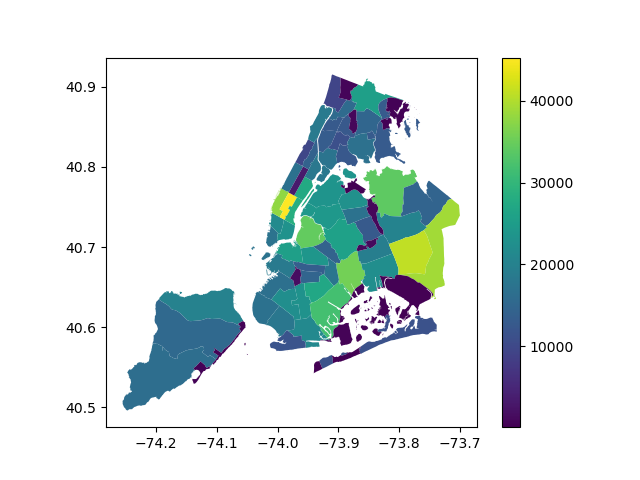

<AxesSubplot:>

In [32]:
mv_collision_geo.plot(column='case_num', legend=True)

In [48]:
mv_collision_geo.to_file('data/mv_collision_geo.geojson')

In [45]:
mv_collision['NUMBER OF PERSONS INJURED'] = mv_collision['NUMBER OF PERSONS INJURED'].astype(float)
mv_collision['NUMBER OF PERSONS KILLED'] = mv_collision['NUMBER OF PERSONS KILLED'].astype(float)

mv_collision_injured_geo = nyc_geo.copy(deep=True)
mv_collision_injured_geo['injured_num'] = 0
mv_collision_injured_geo['killed_num'] = 0
mv_collision_injured_geo['vehicle_num'] = 0
for i, c_row in mv_collision.iterrows():
    for j, g_row in mv_collision_injured_geo.iterrows():
        if g_row.geometry.contains(c_row.geometry):
            mv_collision_injured_geo.at[j,'injured_num'] += 0 if pd.isnull(c_row['NUMBER OF PERSONS INJURED']) else c_row['NUMBER OF PERSONS INJURED']
            mv_collision_injured_geo.at[j,'killed_num'] += 0 if pd.isnull(c_row['NUMBER OF PERSONS KILLED']) else c_row['NUMBER OF PERSONS KILLED']
            mv_collision_injured_geo.at[j,'vehicle_num'] += 0 if pd.isnull(c_row['CONTRIBUTING FACTOR VEHICLE 1']) else 1
            mv_collision_injured_geo.at[j,'vehicle_num'] += 0 if pd.isnull(c_row['CONTRIBUTING FACTOR VEHICLE 2']) else 1
            mv_collision_injured_geo.at[j,'vehicle_num'] += 0 if pd.isnull(c_row['CONTRIBUTING FACTOR VEHICLE 3']) else 1
            mv_collision_injured_geo.at[j,'vehicle_num'] += 0 if pd.isnull(c_row['CONTRIBUTING FACTOR VEHICLE 4']) else 1
            mv_collision_injured_geo.at[j,'vehicle_num'] += 0 if pd.isnull(c_row['CONTRIBUTING FACTOR VEHICLE 5']) else 1
           
            

mv_collision_injured_geo 

boro_cd     shape_area     shape_leng  \
0      101  42689119.0133  74168.5878924   
1      102  37689205.9401  34130.5952768   
2      103  46879779.2986  30695.6409632   
3      104  49311715.1126  67623.6699012   
4      105  43790329.8699  35288.1885095   
..     ...            ...            ...   
66     502  592715674.432  143044.989836   
67     503  599053419.389  193564.186317   
68     595  54734567.3489  110147.254437   
69     203  44803080.7253  33500.8967412   
70     209  114278736.079  62244.1088593   

                                             geometry  injured_num  \
0   MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...         2824   
1   MULTIPOLYGON (((-73.99684 40.73736, -73.99362 ...         3646   
2   MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...         5143   
3   MULTIPOLYGON (((-73.99394 40.77318, -73.99370 ...         5155   
4   MULTIPOLYGON (((-73.97301 40.76428, -73.97141 ...         7270   
..                                                ...          ...   
66  MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ...         4112   
67  MULTIPOLYGON (((-74.13320 40.53631, -74.13301 ...         4132   
68  MULTIPOLYGON (((-74.11834 40.55046, -74.11676 ...           92   
69  MULTIPOLYGON (((-73.88072 40.83752, -73.88074 ...         3364   
70  MULTIPOLYGON (((-73.83979 40.83562, -73.83967 ...         4493   

    killed_num  vehicle_num  
0           11        32185  
1           17        40726  
2           19        43493  
3           27        72591  
4           29        85936  
..         ...          ...  
66          25        30161  
67          26        31429  
68           2          555  
69           8        21144  
70          23        32100  

[71 rows x 7 columns]

In [49]:
mv_collision_injured_geo.to_file('data/mv_collision_injured_geo.geojson')

C:\Users\yym12\AppData\Local\Temp/ipykernel_5196/568883684.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  mv_collision_injured_geo.to_file('data/mv_collision_injured_geo.geojson')


<IPython.core.display.Javascript object>


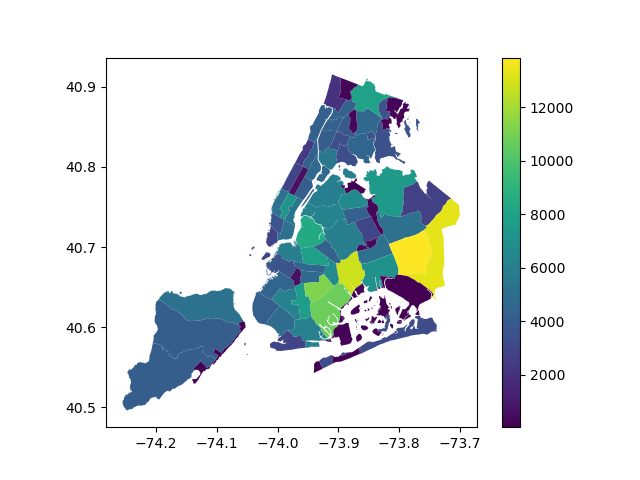

<AxesSubplot:>

In [50]:
mv_collision_injured_geo.plot(column='injured_num', legend=True)

<IPython.core.display.Javascript object>


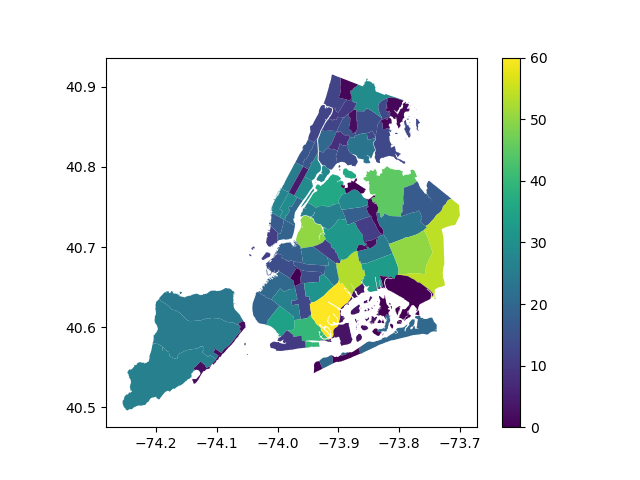

<AxesSubplot:>

In [51]:
mv_collision_injured_geo.plot(column='killed_num', legend=True)

<IPython.core.display.Javascript object>


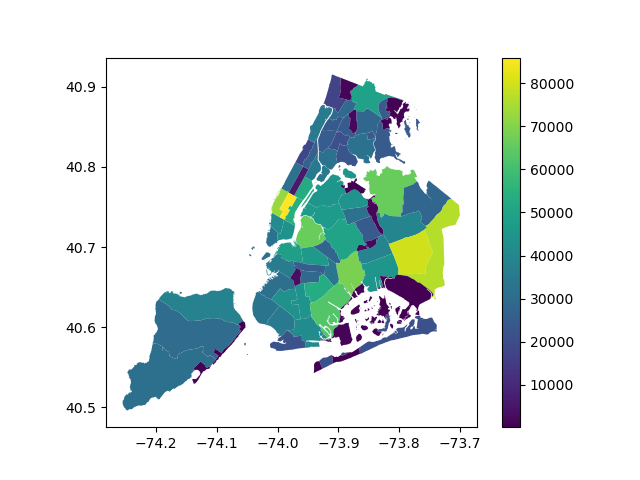

<AxesSubplot:>

In [52]:
mv_collision_injured_geo.plot(column='vehicle_num', legend=True)

In [67]:
mv_collision = mv_collision.rename(columns={'CRASH DATE': 'CRASH_DATE', 'CRASH TIME': 'CRASH_TIME'})
# mv_collision['CRASH DATE'] = pd.to_datetime(mv_collision.CRASH_DATE, format='%Y-%m-%d %H:%M:%S')
mv_collision['CRASH DATE'] = pd.to_datetime(mv_collision.CRASH_DATE, format='%Y-%m-%d')
mv_collision

Unnamed: 0           CRASH_DATE CRASH_TIME        BOROUGH ZIP CODE  \
0                1  2021-04-13 00:00:00      21:35       BROOKLYN    11217   
5               13  2019-05-21 00:00:00      22:50       BROOKLYN    11201   
6               15  2021-02-26 00:00:00      14:50          BRONX    10461   
7               17  2021-03-31 00:00:00      22:20       BROOKLYN    11234   
8               18  2021-04-06 00:00:00      22:58  STATEN ISLAND    10312   
...            ...                  ...        ...            ...      ...   
1263342    1838939  2012-07-07 00:00:00      17:35       BROOKLYN    11235   
1263343    1838940  2012-07-06 00:00:00      15:09      MANHATTAN    10035   
1263344    1838941  2012-07-03 00:00:00      17:30         QUEENS    11102   
1263345    1838942  2012-07-01 00:00:00      15:30       BROOKLYN    11236   
1263346    1838944  2012-07-05 00:00:00      23:00         QUEENS    11367   

          LATITUDE  LONGITUDE                   LOCATION  \
0        40.683580 -73.976170      (40.68358, -73.97617)   
5        40.697540 -73.983120      (40.69754, -73.98312)   
6        40.843464 -73.836000       (40.843464, -73.836)   
7        40.626457 -73.918000       (40.626457, -73.918)   
8        40.526894 -74.167280     (40.526894, -74.16728)   
...            ...        ...                        ...   
1263342  40.575802 -73.961137  (40.5758019, -73.9611371)   
1263343  40.801235 -73.941815  (40.8012354, -73.9418153)   
1263344  40.774711 -73.933386  (40.7747112, -73.9333863)   
1263345  40.645032 -73.919978  (40.6450318, -73.9199775)   
1263346  40.719910 -73.809039  (40.7199104, -73.8090389)   

                           ON STREET NAME                 CROSS STREET NAME  \
0                                     NaN                               NaN   
5                             GOLD STREET                    CONCORD STREET   
6                                     NaN                               NaN   
7                            RALPH AVENUE                          AVENUE K   
8                          BARCLAY AVENUE                   HYLAN BOULEVARD   
...                                   ...                               ...   
1263342  BRIGHTON 6 STREET                 BRIGHTWATER COURT                  
1263343  EAST 119 STREET                   PARK AVENUE                        
1263344  27 AVENUE                         4 STREET                           
1263345  RALPH AVENUE                      CLARENDON ROAD                     
1263346  PARSONS BOULEVARD                 UNION TURNPIKE                     

         ... CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
0        ...                           NaN                            NaN   
5        ...                           NaN                            NaN   
6        ...                           NaN                            NaN   
7        ...                           NaN                            NaN   
8        ...                           NaN                            NaN   
...      ...                           ...                            ...   
1263342  ...                           NaN                            NaN   
1263343  ...                           NaN                            NaN   
1263344  ...                           NaN                            NaN   
1263345  ...                           NaN                            NaN   
1263346  ...                           NaN                            NaN   

         COLLISION_ID                  VEHICLE TYPE CODE 1  \
0             4407147                                Sedan   
5             4136992                                 锟組BU   
6             4395664  Station Wagon/Sport Utility Vehicle   
7             4403773                                Sedan   
8             4405244  Station Wagon/Sport Utility Vehicle   
...               ...                                  ...   
1263342        113584                    P

In [98]:

df_case_by_date = mv_collision.groupby(mv_collision['CRASH_DATE']).size().reset_index(name='Count')
df_case_by_date = df_case_by_date[(df_case_by_date['CRASH_DATE']> "2020-11-01") & (df_case_by_date['CRASH_DATE']< "2021-12-01")]


<IPython.core.display.Javascript object>


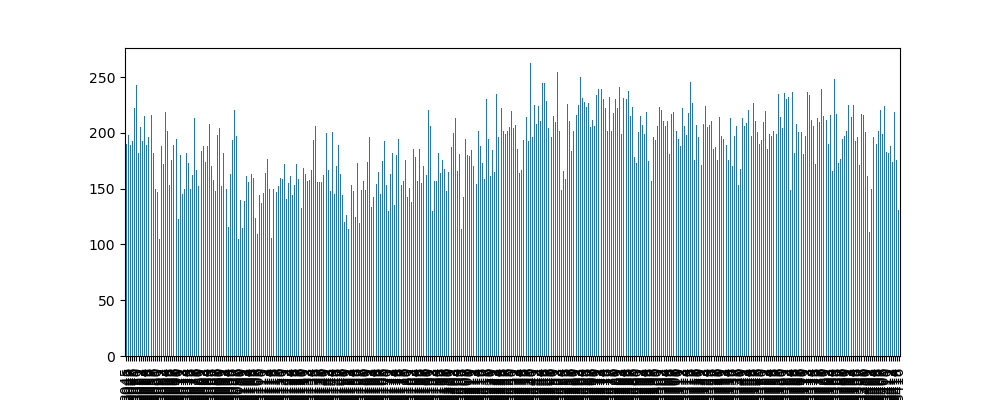

AttributeError: 'int' object has no attribute 'strftime'

In [117]:
# Create sample time series with month start frequency, plot it with a pandas bar chart
# rng = np.random.default_rng(seed=1) # random number generator
# dti = pd.date_range('12/1/2020', periods=12, freq='M')
# df = pd.DataFrame(data=df_case_by_date, index=dti)
# df = pd.DataFrame(data=rng.normal(size=dti.size), index=dti)
ax = df_case_by_date.plot.bar(figsize=(10,4), legend=None)

# Set major ticks and tick labels
ax.set_xticks(range(df_case_by_date.index.size))
# ax.set_xticklabels([ts.strftime('%b\n%Y') if ts.year != df.index[idx-1].year
#                     else ts.strftime('%b') for idx, ts in enumerate(df.index)])
ax.set_xticklabels([ts.strftime('%b\n%Y%m') for idx, ts in enumerate(df_case_by_date.index)])
ax.figure.autofmt_xdate(rotation=0, ha='center');

In [104]:
df_case_by_time = mv_collision[['CRASH_DATE','CRASH_TIME']]
df_case_by_time['CRASH_TIME'] = pd.to_datetime(df_case_by_time['CRASH_TIME'], format='%H:%M').dt.hour
# df_case_by_time = df_case_by_time[(df_case_by_time['CRASH_DATE']> "2020-11-01") & (df_case_by_time['CRASH_DATE']< "2021-12-01")]

df_case_by_time = df_case_by_date.groupby(df_case_by_time.CRASH_TIME).size().reset_index(name='Count')
df_case_by_time

C:\Users\yym12\AppData\Local\Temp/ipykernel_5196/1529478254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case_by_time['CRASH_TIME'] = pd.to_datetime(df_case_by_time['CRASH_TIME'], format='%H:%M').dt.hour


CRASH_TIME  Count
0          0.0     18
1          1.0     10
2          2.0      7
3          3.0      3
4          4.0      3
5          5.0      6
6          6.0      7
7          7.0      6
8          8.0     18
9          9.0     12
10        10.0     12
11        11.0     15
12        12.0     13
13        13.0     27
14        14.0     25
15        15.0     32
16        16.0     34
17        17.0     27
18        18.0     20
19        19.0     16
20        20.0     13
21        21.0     12
22        22.0     17
23        23.0     14

<IPython.core.display.Javascript object>


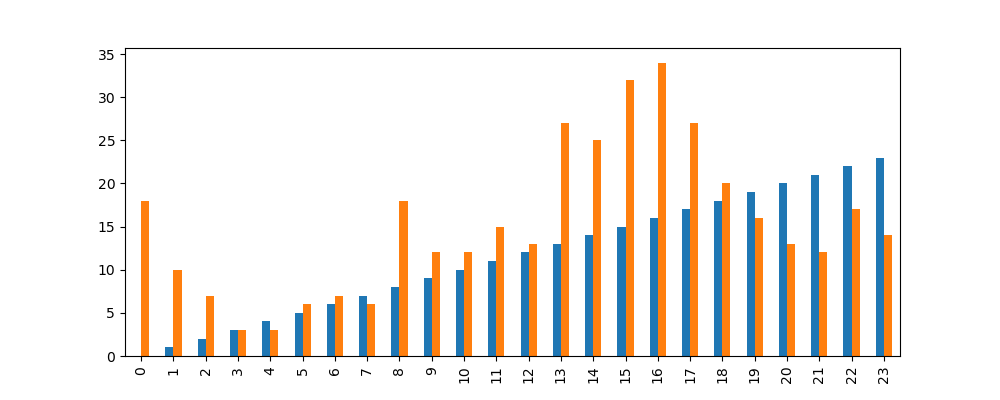

AttributeError: 'int' object has no attribute 'strftime'

In [114]:
ax = df_case_by_time.plot.bar(figsize=(10,4), legend=None)

# Set major ticks and tick labels
ax.set_xticks(range(df_case_by_time.index.size))
# ax.set_xticklabels([ts.strftime('%b\n%Y') if ts.year != df.index[idx-1].year
#                     else ts.strftime('%b') for idx, ts in enumerate(df.index)])
ax.set_xticklabels([ts.strftime('%b\n') for idx, ts in enumerate(df_case_by_time.index)])
ax.figure.autofmt_xdate(rotation=0, ha='center');

In [155]:
df_case_by_reason = mv_collision[['BOROUGH','CONTRIBUTING FACTOR VEHICLE 1']]
df_case_by_reason = df_case_by_reason.rename(columns={'BOROUGH': 'BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1': 'REASON'})
df_case_by_reason = df_case_by_reason.groupby(['BOROUGH', 'REASON']).size().reset_index(name='Count')
df_case_by_reason = df_case_by_reason.groupby(['BOROUGH'])[['REASON','Count']].apply(lambda x: x.nlargest(5, columns=['Count']))
df_case_by_reason

REASON   Count
BOROUGH                                                  
BRONX         55                      Unspecified   77949
              10   Driver Inattention/Distraction   27304
              31                  Other Vehicular    8140
              17    Failure to Yield Right-of-Way    7844
              5                  Backing Unsafely    7723
BROOKLYN      115                     Unspecified  170492
              70   Driver Inattention/Distraction   62984
              77    Failure to Yield Right-of-Way   24760
              65                 Backing Unsafely   15895
              80            Following Too Closely   11890
MANHATTAN     176                     Unspecified   92983
              131  Driver Inattention/Distraction   57721
              152                 Other Vehicular   16758
              138   Failure to Yield Right-of-Way   12818
              173              Turning Improperly   10428
QUEENS        237                     Unspecified  123271
              192  Driver Inattention/Distraction   69160
              199   Failure to Yield Right-of-Way   27296
              187                Backing Unsafely   16689
              202           Following Too Closely   11054
STATEN ISLAND 297                     Unspecified   21460
              253  Driver Inattention/Distraction    9812
              260   Failure to Yield Right-of-Way    3103
              248                Backing Unsafely    2257
              263           Following Too Closely    1895

In [161]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
df_case_by_reason.iloc[[0]]
# df_case_by_reason.loc[gb.groups['foo']]
# df_case_by_reason.get_group('BRONX')
# df_case_by_reason[df_case_by_reason['BOROUGH'] == 'BRONX']
# BRONX_collision_reason = df_case_by_reason[df_case_by_reason['BOROUGH'] == 'BRONX']
# BRONX_collision_reason

# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# sizes = [15, 30, 45, 10]
# explode = (0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# plt.show()

REASON  Count
BOROUGH                       
BRONX   55  Unspecified  77949